<a href="https://colab.research.google.com/github/GousemujeebShaik/Case-Studies/blob/main/RecomenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MUSIC RECOMMENDATION SYSTEM
We have four datasets namely:

1) kaggle_users.txt: This dataset consists of different users who listen to the song represented by the column 'userid'.

2) kaggle_songs.txt: This dataset consists of different songs with their respective song IDs.

3) kaggle_visible_evaluation_triplets.txt: This dataset consists of three columns namely, Userid , Songid and Freq

4) unique_tracks.txt: This dataset consists of four columns namely,Trackid', 'Songid','ArtistName' and'Release'

In [ ]:
 
# Import section Github
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Lets read all the Four DataSets:
1. Users: Where we have all the unique UserID's.
2. Songs: We have list of all the SongID's
3. Triplets: This data set will give the frequency of the Songs listned by user.
4. Unique Track: Will give us the details of the Song Artist and release

In [ ]:
df_user = pd.read_csv('data/kaggle_users.txt', sep='\t', names=['userid'])
df_user.head()

,userid
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d
1,d7083f5e1d50c264277d624340edaaf3dc16095b
2,d68dc6fc25248234590d7668a11e3335534ae4b4
3,9be82340a8b5ef32357fe5af957ccd54736ece95
4,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8


In [ ]:
df_songs = pd.read_csv('data/kaggle_songs.txt', sep=' ', names=['SongID','Sr.No'])
df_songs.drop('Sr.No', axis=1, inplace=True)
df_songs.head()

,SongID
0,SOAAADD12AB018A9DD
1,SOAAADE12A6D4F80CC
2,SOAAADF12A8C13DF62
3,SOAAADZ12A8C1334FB
4,SOAAAFI12A6D4F9C66


In [ ]:
df_triplet = pd.read_csv('data/kaggle_visible_evaluation_triplets.txt', sep='\t', names=['Userid', 'Songid','Freq'])
df_triplet.head()

,Userid,Songid,Freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [ ]:
df_uniquetrack = pd.read_csv('data/unique_tracks.txt', sep='<SEP>', names=['Trackid', 'Songid','ArtistName','Release'])
df_uniquetrack.head()

,Trackid,Songid,ArtistName,Release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


Now that all the Data is available, let's start with the EDA Analysis

Merge both the Triplets and Unique Track dataset on the Song ID columns.

In [ ]:
df_merge=pd.merge(df_triplet,df_uniquetrack, how='left')
df_merge.tail()

,Userid,Songid,Freq,Trackid,ArtistName,Release
1491947,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1,TRPLXFD128F1454961,Mos Def,Ms. Fat Booty
1491948,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2,TRRBUQL12903CCE501,Sam Cooke,Ain't Misbehavin
1491949,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2,TRHNKAU128F9300856,Southside Spinners,Luvstruck
1491950,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2,TRDULYN128F4248762,J. Karjalainen & Mustat Lasit,Sinisten tähtien alla
1491951,5e650759ebf89012044c6d52121eeada8b0ec814,SOTCMDJ12A6D4F8528,3,TRZJNDO128EF343498,Angels and Airwaves,The Gift


Seaborn Plot to find if any null values.. Also using the isnull() and Sum() methods

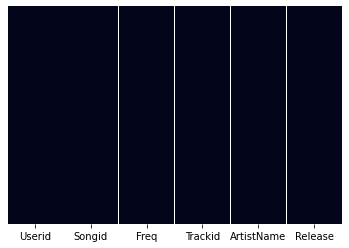

In [ ]:
sns.heatmap(df_merge.isnull(),yticklabels=False,cbar=False)

In [ ]:
df_merge.isnull().sum()

Userid        0
Songid        0
Freq          0
Trackid       0
ArtistName    0
Release       1
dtype: int64

In [ ]:
df_merge['Freq'].fillna(0,inplace=True)

In [ ]:
df_merge.tail()

,Userid,Songid,Freq,Trackid,ArtistName,Release
1491947,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1,TRPLXFD128F1454961,Mos Def,Ms. Fat Booty
1491948,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2,TRRBUQL12903CCE501,Sam Cooke,Ain't Misbehavin
1491949,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2,TRHNKAU128F9300856,Southside Spinners,Luvstruck
1491950,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2,TRDULYN128F4248762,J. Karjalainen & Mustat Lasit,Sinisten tähtien alla
1491951,5e650759ebf89012044c6d52121eeada8b0ec814,SOTCMDJ12A6D4F8528,3,TRZJNDO128EF343498,Angels and Airwaves,The Gift


As the Song ID and the Track ID serve the same purpose we can drop any one

In [ ]:
df_merge.drop('Trackid',axis=1, inplace=True)

In [ ]:
   df_merge.head()

,Userid,Songid,Freq,ArtistName,Release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero


In [ ]:
df_merge.shape

(1491952, 5)

In [ ]:
print("The Total Songs Listened are {}".format(df_merge.shape[0]))
print("The Total number of Users are {}".format(df_merge['Userid'].nunique()))
print("The Total number of Songs are {}".format(df_merge['Songid'].nunique()))
print("The Total number of Artists are {}".format(df_merge['ArtistName'].nunique()))
print("The Total number of Release are {}".format(df_merge['Release'].nunique()))

The Total Songs Listened are 1491952
The Total number of Users are 110000
The Total number of Songs are 163206
The Total number of Artists are 28367
The Total number of Release are 137670


# PDF Of Different Songs listened by the users






In [ ]:
df_merge['Userid'].value_counts()

316110734d8da7478cc33237458814f770a9eb7a    57
ad4b2717e89766b66b96fe52a38736116e315874    57
3233c598c50f0ddbd351504e773cd51de79691db    55
d30e18323f15426c3cdc8585252ed34459916f51    55
0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90    54
                                            ..
ae71974cef9c62397591e2beba1359cb22e4f4ae     5
42a35793e45dfbf73fbda371f3811e3c6be826ef     5
6e5582f27658b9b8d5eed67e42343dca15c24832     5
4d2a1009c43a00dd1c5135f8d27289a288540985     5
b8ab760d40bf328d8ef08fe6c618d139d079891f     5
Name: Userid, Length: 110000, dtype: int64

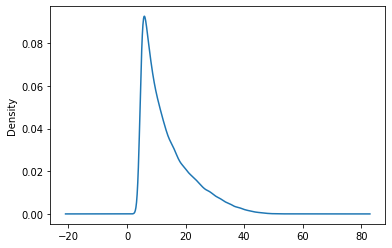

In [ ]:
df_merge['Userid'].value_counts().plot.kde()

In [ ]:
df_merge['Userid'].value_counts().describe()

count    110000.000000
mean         13.563200
std           8.321648
min           5.000000
25%           7.000000
50%          11.000000
75%          18.000000
max          57.000000
Name: Userid, dtype: float64

Text(0.5, 1.0, 'Top 10 users that listned more distinct songs')

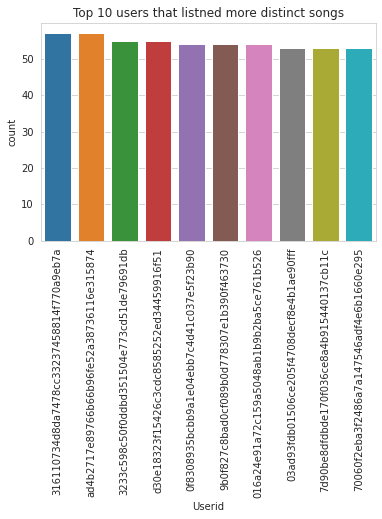

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Userid',data=df_merge,order=df_merge['Userid'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title("Top 10 users that listned more distinct songs")

# Top 5 users with maximum listens

Below are the Top five Users, that listned the Songs Most

In [ ]:
df_merge[['Userid','Freq']].groupby(['Userid'],sort=True).sum().sort_values(['Freq'], ascending=False).head(5)

,Freq
Userid,
938c2632d43eeadb8a83a7cc254d014f9cea6afe,1369
090b841eaf56d343a26625c2c6d08b823927bc4f,1305
1c5aa998482a40abfd020759e7d757eb6c510e72,1213
c6150292374fb1dad89982367b3245dd5004c718,1192
957440a77858369fb7a6bcc6fa408fc187d5bd7b,1187


In [ ]:
df_merge[['Userid','Freq']].groupby(['Userid'],sort=True).sum().sort_values(['Freq'], ascending=False).head(5).describe()

,Freq
count,5.000000
mean,1253.200000
std,80.369148
min,1187.000000
25%,1192.000000
50%,1213.000000
75%,1305.000000
max,1369.000000


Text(0.5, 1.0, 'Top 10 Users that listned the Song more')

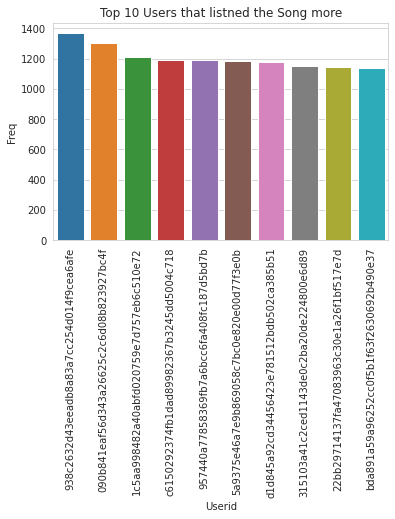

In [ ]:
data=df_merge.groupby(['Userid'],sort=True).sum()
data=data.reset_index()
sns.barplot(x='Userid',y='Freq',data=data,   order=data.sort_values(['Freq'],ascending=False)['Userid'].iloc[:10])
plt.xticks(rotation=90)
plt.title("Top 10 Users that listned the Song more")

# New section

# Last 5 users with minimum listens

Below are the Least Five Users that listned the Song less

In [ ]:
df_merge[['Userid','Freq']].groupby(['Userid'],sort=True).sum().sort_values(['Freq'], ascending=True).head(5)

,Freq
Userid,
1858b9d771784f35b11587d4848604d5686e2e6a,5
105e070c30b924ad8c12dfc93879510fffce9e9f,5
473faa31a070d046588438a24838ee2ea59ba75a,5
4117443d6ef69fdf555b736782bed19a2bf73218,5
23a0d4a8ba71eef8abd4e4e4dd83060952c703f7,5


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

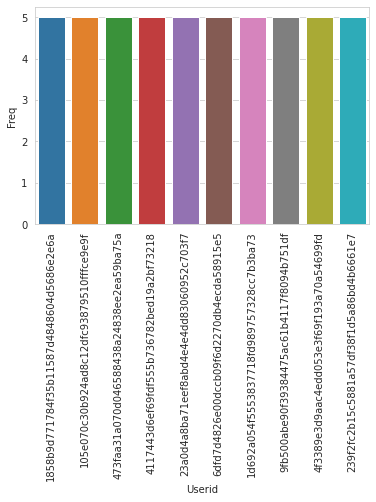

In [ ]:
data=df_merge.groupby(['Userid'],sort=True).sum()
data=data.reset_index()
sns.barplot(x='Userid',y='Freq',data=data,   order=data.sort_values(['Freq'],ascending=True)['Userid'].iloc[:10])
plt.xticks(rotation=90)

# Popularity of Songs

most listened songs

In [ ]:
df_merge[['Userid','Songid']].groupby(['Songid'])['Songid'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(5)

,Songid,count
38185,SOFRQTD12A81C233C0,5043
5478,SOAUWYT12A81C206F1,4483
10546,SOBONKR12A58A7A7E0,4136
140446,SOWCKVR12A8C142411,3822
6096,SOAXGDH12A8C13F8A1,3780


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

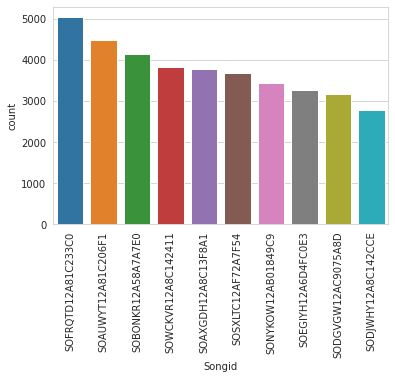

In [ ]:
data =df_merge[['Userid','Songid']].groupby(['Songid'])['Songid'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
sns.barplot(x='Songid',y='count',data=data)
plt.xticks(rotation=90)

In [ ]:
song_popularity=df_merge['Songid'].value_counts()

In [ ]:
song_popularity

SOFRQTD12A81C233C0    5043
SOAUWYT12A81C206F1    4483
SOBONKR12A58A7A7E0    4136
SOWCKVR12A8C142411    3822
SOAXGDH12A8C13F8A1    3780
                      ... 
SOLDWXS12AB0182167       1
SOYMVZI12A8C1402AC       1
SOJMOOM12A5891D5F8       1
SOBWIJD12AB017CF55       1
SOQQTRL12A6D4F6514       1
Name: Songid, Length: 163206, dtype: int64

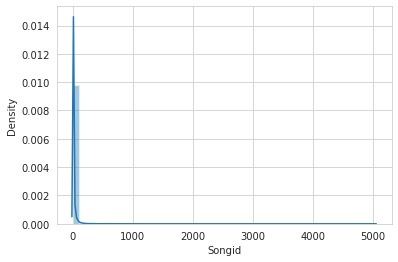

In [ ]:
sns.distplot(song_popularity, hist=True, kde=True)

Below are the Last Five Least Listned Songs

In [ ]:
df_merge[['Userid','Songid']].groupby(['Songid'])['Songid'].count().reset_index(name='count').sort_values(['count'], ascending=True).head(5)

,Songid,count
121078,SOSVEKO12AB01884A5,1
109853,SOQYUKJ12A8C137555,1
109851,SOQYTWN12A8C138B38,1
109850,SOQYTSU12AC468C5E9,1
49885,SOHLNPT12AB01860FE,1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

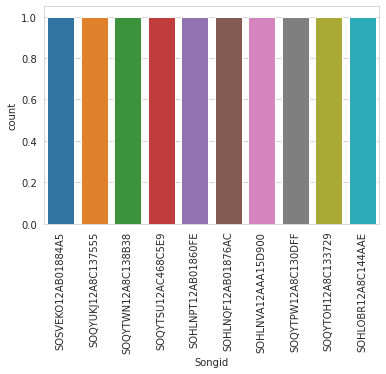

In [ ]:
data =df_merge[['Userid','Songid']].groupby(['Songid'])['Songid'].count().reset_index(name='count').sort_values(['count'], ascending=True).head(10)
sns.barplot(x='Songid',y='count',data=data)
plt.xticks(rotation=90)

## Users with maximum no. of repeats for a particular song

In [ ]:
df_merge[['Userid','Songid','Freq']].sort_values(['Freq'],ascending=False)

,Userid,Songid,Freq
1490140,22bb29714137fa47083963c30e1a26f1bf517e7d,SOXTUWG12AB018A2E2,923
862102,a1cc4d088600df2db42e6a305974675ffe8c905d,SOPMHHE12AB01845F6,646
484425,2d9ea6058d0872ccdc5b1c5c685758bb9c55f0a3,SOAOXTG12A67021AA7,597
1334371,69ad6b6a1d14d740eb8c2f013a19c1f8048cecde,SONGOJV12AF729AEBD,582
660940,a86e68128c6a48d3392db22ce1151a3bdccf5fcf,SOFVLYV12A8C145D8F,537
...,...,...,...
631230,287db61de9cc414bca70cc80c1a977118da45f4d,SOWYRRB12A8C13ADFA,1
631231,287db61de9cc414bca70cc80c1a977118da45f4d,SOAYATB12A6701FD50,1
631234,287db61de9cc414bca70cc80c1a977118da45f4d,SOVMWUC12A8C13750B,1
631235,287db61de9cc414bca70cc80c1a977118da45f4d,SOBTXPM12A8C13D393,1


# Most Popular Artists

In [ ]:
df_merge['ArtistName'].value_counts().sort_values()

Dance Or Die                        1
Frustration                         1
The London Theatre Orchestra        1
French Miami                        1
Distorted Minds                     1
                                ...  
Eminem                           8160
Florence + The Machine           8213
Justin Bieber                    9259
Kings Of Leon                   11586
Coldplay                        13675
Name: ArtistName, Length: 28367, dtype: int64

In [ ]:
popularity_artist=df_merge['ArtistName'].value_counts().sort_values()

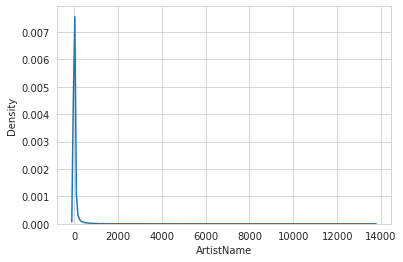

In [ ]:
sns.kdeplot(popularity_artist)

In [ ]:
df_merge[['ArtistName','Songid']].groupby('ArtistName').count().sort_values('Songid',ascending= False).head()

,Songid
ArtistName,
Coldplay,13675
Kings Of Leon,11586
Justin Bieber,9259
Florence + The Machine,8213
Eminem,8160


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

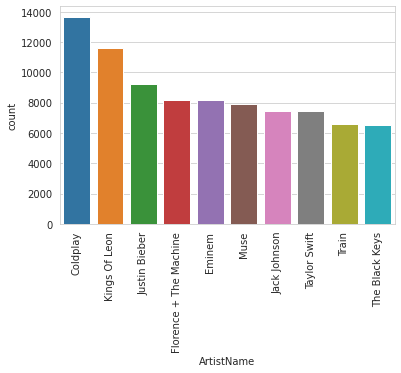

In [ ]:
data =df_merge[['ArtistName','Songid']].groupby(['ArtistName'])['ArtistName'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
sns.barplot(x='ArtistName',y='count',data=data)
plt.xticks(rotation=90)

# Least Popular Artists

In [ ]:
df_merge[['ArtistName','Songid']].groupby('ArtistName').count().sort_values('Songid',ascending= True).head()

,Songid
ArtistName,
Özlem Tekin,1
Witchdoctor,1
Trini López,1
Lab Report,1
Lady Bug Transistor,1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

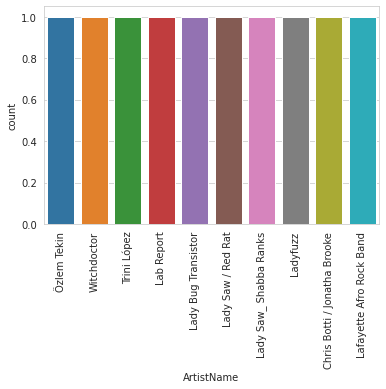

In [ ]:
data =df_merge[['ArtistName','Songid']].groupby(['ArtistName'])['ArtistName'].count().reset_index(name='count').sort_values(['count'], ascending=True).head(10)
sns.barplot(x='ArtistName',y='count',data=data)
plt.xticks(rotation=90)

# Artists with maximum songs released

In [ ]:
df_uniquetrack[['ArtistName','Songid']].groupby(['ArtistName']).count().sort_values('Songid',ascending=False).head(5)

,Songid
ArtistName,
Michael Jackson,194
Johnny Cash,193
Beastie Boys,187
Joan Baez,181
Neil Diamond,176


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

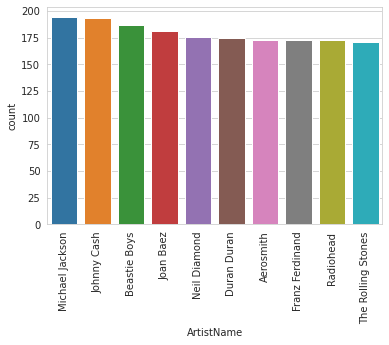

In [ ]:
data =df_uniquetrack[['ArtistName','Songid']].groupby(['ArtistName'])['ArtistName'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
sns.barplot(x='ArtistName',y='count',data=data)
plt.xticks(rotation=90)

# Artists with minimum song released

In [ ]:
#Artist with Less songs

df_uniquetrack[['ArtistName','Songid']].groupby(['ArtistName']).count().sort_values('Songid',ascending=True).head(5)

,Songid
ArtistName,
"Little Louie"" Vega Feat. Arnold Jarvis",1
Greg Hawks & The Tremblers,1
Greg Edwards,1
Greg Davis_ Sébastien Roux,1
Greg Davis & Jeph Jerman,1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

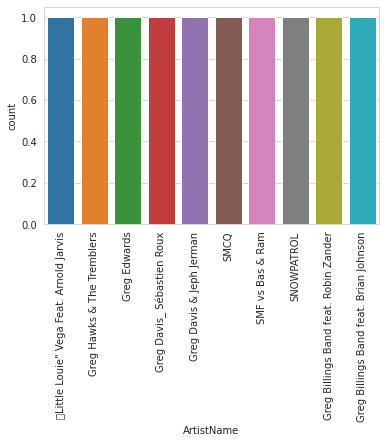

In [ ]:
data =df_uniquetrack[['ArtistName','Songid']].groupby(['ArtistName'])['ArtistName'].count().reset_index(name='count').sort_values(['count'], ascending=True).head(10)
sns.barplot(x='ArtistName',y='count',data=data)
plt.xticks(rotation=90)

In [ ]:
#For my intrest, want to check the songs by Michael Jackson	
dt_m=df_uniquetrack[df_uniquetrack['ArtistName']=='Michael Jackson']
dt_m[dt_m[['Songid','Release']].duplicated()][['Songid','Release']].shape

(14, 2)

In [ ]:
df_uniquetrack[df_uniquetrack['Songid'].duplicated()]['Songid'].shape

(944,)

From the above it is Clear that we have 14 duplicate song id for Michael Jackson and 944 for all the songid's

In [ ]:
#For my intrest, want to check the songs by Michael Jackson	
dt_m=df_uniquetrack[df_uniquetrack['ArtistName']=='Michael Jackson']
dt_m[dt_m[['Trackid','Songid','Release']].duplicated()][['Trackid','Songid','Release']].shape

(0, 3)

So when considering the Track ID, we are getting the unique values, So let's see how many songs are mapped to each track

In [ ]:
df_uniquetrack[['Trackid','Songid','Release']].groupby('Songid').count().sort_values('Release',ascending=False).head()

,Trackid,Release
Songid,,
SOEHQBQ12A6D4F9EA9,3,3
SOPOCDY12A8C13F75A,3,3
SOEGQML12AF7299C84,3,3
SOBPAEP12A58A77F49,3,3
SOVSGJB12A8C13F772,3,3


So, From the above figures it is clear that 1 songid is mapped to multiple Track and release

In [ ]:
dt_m[['Songid']].value_counts()

Songid            
SOQUAIH12AB0181406    2
SOBKDCU12A6D4F80F6    2
SOWAEPK12A8C13543B    2
SOHZIPR12A8C1350D3    2
SOGHXZH12A8C1388B9    2
                     ..
SOPXWKJ12CF5F86F3D    1
SOPINQU12A58A7C781    1
SOPIHZM12CF5F89127    1
SOPAVVQ12CF58265C2    1
SOAKAEZ12A6D4F80E4    1
Length: 179, dtype: int64

Let's find how many songs are released in each Release

In [ ]:
df_uniquetrack[['Songid','ArtistName','Release']].groupby(['Release','ArtistName']).count().sort_values('Songid',ascending=False)

,,Songid
Release,ArtistName,
Untitled,Der Blutharsch,87
Hip-Hop Beats,Hip-Hop Beats,33
Untitled,7000 Dying Rats,31
Greece 2000,Three Drives,28
Bonus Track,Elakelaiset,25
...,...,...
Hey Jim,James Moody,1
Hey Jimmy,Los Natas,1
Hey Jimmy Freek,The Neptunas,1


In [ ]:
df_uniquetrack[df_uniquetrack['Release']=='Untitled']

,Trackid,Songid,ArtistName,Release
4145,TRMGVDK12903CB6FA7,SODNRCH12AB0185AD9,Der Blutharsch,Untitled
8449,TRMRJUC128F4275423,SOJXDWU12A8C13F636,Harry Pussy,Untitled
8730,TRMROOY128F9353E6B,SOUUXQO12AB0189A02,Mikaela's Fiend,Untitled
8976,TRMBMYF128F92C6D14,SOUPWRP12A58A77BE1,Jonezetta,Untitled
12025,TRMQHJD128F424A4FF,SOJJUDG12A8C1324EA,Robert Hood,Untitled
...,...,...,...,...
977117,TRYIZNU12903D04194,SONZPZO12AC468537A,Der Blutharsch,Untitled
983070,TRYTIVP128F42A4E3E,SOSYDPG12A8C13FD25,Agression,Untitled
993373,TRYDNMA12903CB6FD0,SOMCQFO12AB0186E41,Der Blutharsch,Untitled
995675,TRYXWAH128F934C318,SOZVEEA12AB018374C,Psyopus,Untitled


In [ ]:
df_uniquetrack[df_uniquetrack['Release'] != 'Untitled'][['Songid','ArtistName','Release']].groupby(['Release','ArtistName']).count().sort_values('Songid',ascending=False)

,,Songid
Release,ArtistName,
Hip-Hop Beats,Hip-Hop Beats,33
Greece 2000,Three Drives,28
Bonus Track,Elakelaiset,25
Jana Gana Mana,AR Rahman,20
The Age Of Love,Age Of Love,20
...,...,...
Hey Hey (Rock On),The Hot Rocks,1
Hey Hey (Vampires Vs. Cheerleaders Mix),Superchick,1
Hey Hey Baby,Helen Humes,1


From above it is clear that in Hip Hop Beats release 33 Songs has released. (Excluding the Untitiled releases)

# EDA Summary

In our Exploratory Data Analysis of the given dataset, we have found the probability of users listening to an average of 13-20 songs is maximum and the average of distinct songs listened by different users is 13.56. The average number of songs listened in total is 1253.2 for the top 5 most active listeners. We have also observed that only a fraction of songs are likely to be popular. After further analysis, it was observed that the most popular artist was Coldplay with Yellow being the most favorite songs.We have also found that the data consists of some duplicate values in the column named 'Songid', which cause ambiguity in the dataset.  We have calculated and visualize different statistical parameters for the Dataset given.

# Model Building

 We mainly have 3 Types of Recommender Systems
1. Popularity Based
2. Collabrative Filterings
3. Content Based

### **Popularity Based Recommender System:**
As the name indicates, Popularity Based recommendation Systems are the type of recommendation system which works on the principle of popularity and or anything which is in trend. In Simple words, here we recommend the Songs that are more listened. 

This Mainly comes in picture when the user is new or if when we don't have more info about the users likes and dislikes. Here user based personalization is not available


---
#### Merits of popularity based recommendation system:

1.   It does not suffer from cold start problems which means on day 1 of the business also it can recommend products on various different filters.
2.  There is no need for the user's historical data.

#### Demerits of popularity based recommendation system:

1. Not personalized 
2. The system would recommend the same sort of products/movies which are solely based upon popularity to every other user.






### Long Tail Problem

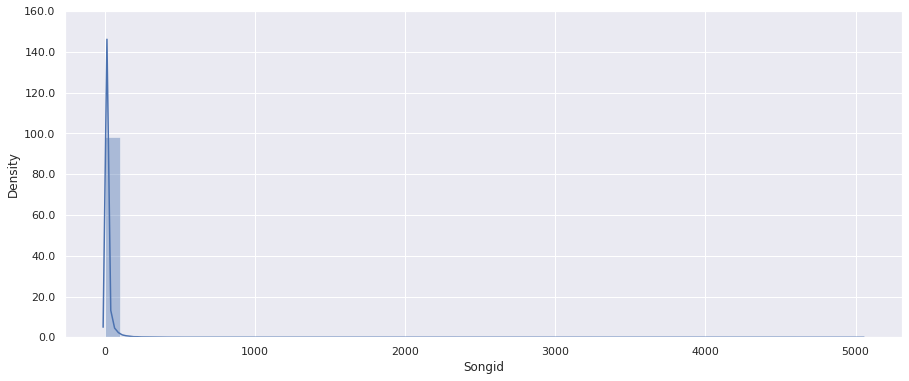

In [ ]:
sns.set(rc={'figure.figsize':(15,6)})
splot=sns.distplot(song_popularity,  hist=True, kde=True)
plt.yticks(splot.get_yticks(), splot.get_yticks() * 10000)
plt.show()

In [ ]:
## Popo